In [1]:
import random
import sys
import time
sys.path.append('..')
import matplotlib.pyplot as plt
import ga4graphcoloring as ga

# GA Graph Coloring

Short example in the use of the package to solve the graph coloring problem.

## Problem description

The graph coloring problem consists in labeling of the graph's vertices with colors such that no two vertices sharing the same edge have the same color.
The term "coloring" is a convention derived from the historical use of the problem (or more precisely, an equivalent formulation) in map coloring.
Actually any finite set can be used as the _color set_. In this particular resolution, the color set is the set of integers from 0 to $k-1$, where $k$ is the number of colors. 

A coloring using at most $k$ colors is called a _k-coloring_.
The smallest $k$ for which a graph has a $k$-coloring is called the _chromatic number_ of the graph.

The particular version of the problem we will tackle is the _decision_ problem, which consists in determining whether a graph can be colored with at most $k$ colors.
The problem is NP-complete, which means that there aren't any known algorithms which can decide it in polynomial time.

The brute force algorithm would be to try all possible colorings, which would require $k^n$ operations, where $n$ is the number of vertices and $k$ is the number of colors.
More efficient algorithms exist, but they are still exponential in the worst case ($O(2^nn)$ for the _Yates_ algorithm).

## Goal of the Project

The goal of the project is to use a genetic algorithm to solve the graph coloring problem.
The idea is that through a non deterministic process, the algorithm will find a solution in a reasonable time, even for large graphs.

## Graph representation

The graph is represented as an adjacency matrix, where the element $(i, j)$ is 1 if there is an edge between nodes $i$ and $j$, and 0 otherwise.
The graph is undirected, there is at most one edge between two nodes and there are no self-loops.

#### Code example

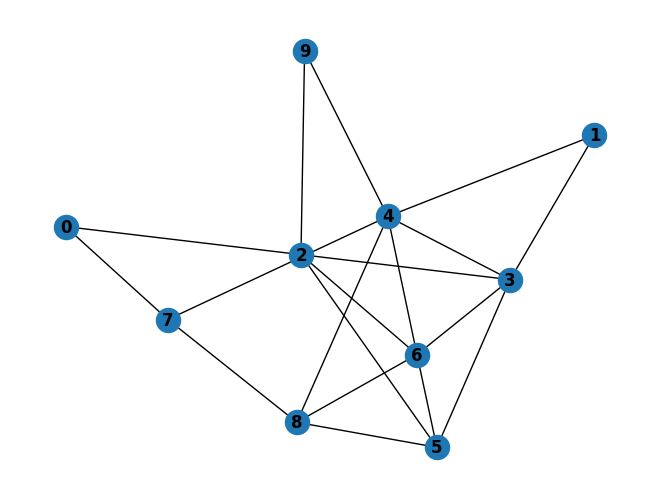

In [2]:
# create and display a random graph

g = ga.Graph(n_vertices=10, density_factor=0.5)
g.display()

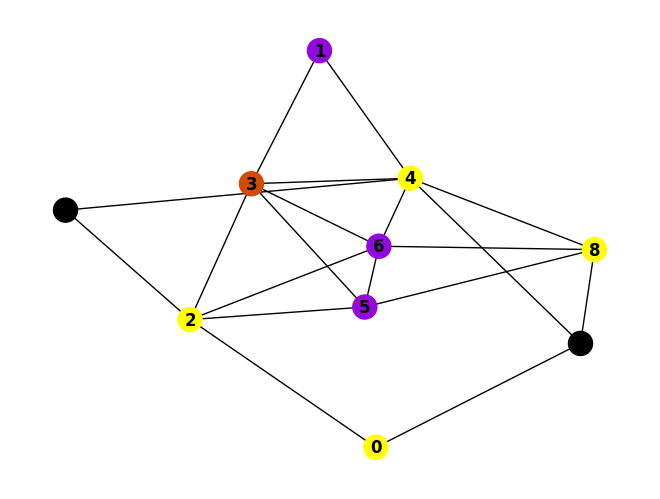

In [3]:
# the graph can be displayed with the colors of the vertices when provided

colors = [random.randint(0, 3) for _ in range(10)]
g.display(colors=colors)

## Genetic algorithm

The genetic algorithm is a heuristic search algorithm inspired by the process of natural selection.
It is based on the idea of evolution, where the fittest individuals are selected for reproduction in order to produce offspring of the next generation.

The algorithm works as follows:
1. **Initialization**: A population of individuals is randomly generated.
2. **Evolution**: The population is evolved over a number of generations. At each generation, the following steps are performed:
    - **Crossover**: Pairs of individuals are selected for reproduction. The crossover operator is applied to produce offspring.
    - **Mutation**: The offspring is subject to mutation, which introduces small random changes in the individuals.
3. **Termination**: The algorithm stops after a number of generations or when a stopping criterion is met.

## Implementation

The genetic algorithm is implemented in two different ways.
The _naive_ implementation is in the `Population` class, while a more targeted implementation is in the `SmartPopulation` class.
Both classes are initialized with a graph and a population size.
The population is represented as a list of individuals, where each individual is a list of integers representing the colors of the vertices.
Both populations are initialized randomly from a uniform distribution of colors.
The _fitness_ of an individual in the population is counted as the number of conflicts in the coloring, i.e. the number of edges between vertices of the same color.

### Naive implementation

The `Population` class implements the genetic algorithm in a naive way.
Optionally, the algorithm can use _elitism_, which means that the top 10% individuals of the population is kept for the next generation.
Otherwise a new population is created from the mutaded offspring of the previous generation.

#### Mutation

The mutation operator is implemented as follows:
1. Every vertex of the individual is mutated with a fixed probability.
2. The vertex is assigned a new color, chosen randomly from the color set.

#### Crossover

The crossover operator is implemented as follows:
1. Two individuals are selected from the population with tournament selection.
2. A random crossover point is chosen.
3. A new individual is created by taking the first part of the first individual and the second part of the second individual.

### Smart implementation

The `SmartPopulation` class implements the genetic algorithm in a more targeted way, by using more specific operators that aim to take an individual closer to the solution.
At each evolution step, half of the population is replaced by random individuals then crossover and mutation are performed.
Crossover is implemented in the same way as in the naive implementation, but the mutation and selection operators are different and depend on the current fitness of the population.
A parameter `change_operator_threshold` is used to switch between the two operators, by confronting the current best fitness with this value.

#### Mutation

The _adjcency mutation_ operator is used when the best fitness is above the threshold:
If a vertex has a conflict, it is mutated with a fixed probability into a color that doesn't cause conflicts.
Otherwise, the _random_mutation_ operator is used: a conflicting vertex is mutaded (with fixed probability) into a random color.

#### Selection

If the fitness is above the threshold a size 2 tournament selection is used.
Otherwise _top genome_ selection is used: the best individual in the population is selected


## Code example

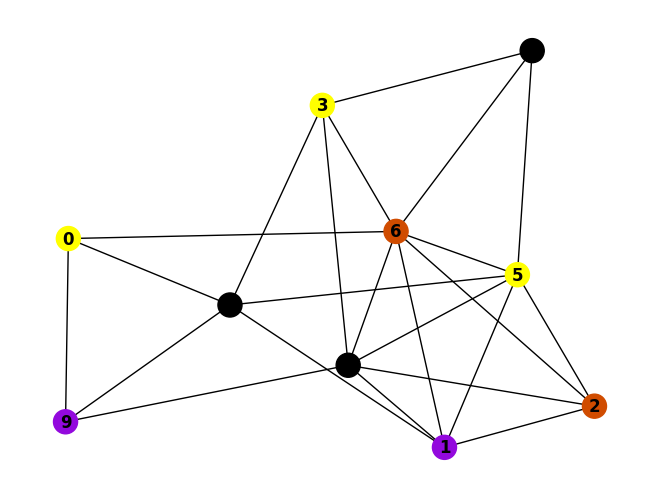

In [4]:
def find_solution(graph, k, max_iter=1000, population_size=100):
    # init population
    pop = ga.Population(k, population_size, graph)
    
    # evolve for max_iter generations
    for i in range(max_iter):
        pop.evolve()
        if pop.best_fitness == 0:
            # if a solution is found, stop
            print(f"Solution found in {i} iterations")
            break

    return pop.solution

# generate a random graph and find a solution

g = ga.Graph(10, 0.5)
sol = find_solution(g, 4, max_iter=100, population_size=50)
g.display(sol)

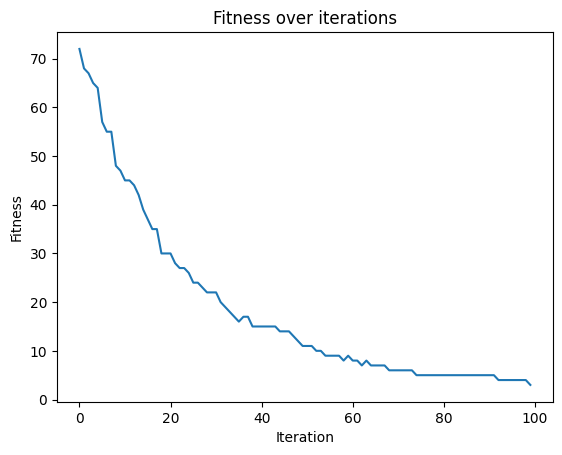

In [5]:
# We can see the progress of the population over the generations

def evolution_course(graph, k, max_iter=1000, population_size=100):
    pop = ga.Population(k, population_size, graph)
    fitness_history = []
    for i in range(max_iter):
        pop.evolve(elitism=False)
        fitness_history.append(pop.best_fitness)
    
    # plot
    plt.plot(fitness_history)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Fitness over iterations')
    plt.show()
    
    if g.n_vertices < 20:
        g.display(pop.solution)

g = ga.Graph(100, 0.4)
evolution_course(g, 16, max_iter=100, population_size=100)

# Comparison with smarter GA Algorithm

In [6]:
def compare_gen_algs(k, n_vertices, max_iter=1000):
    g = ga.Graph(n_vertices, 0.4)
    pop = ga.Population(k, 100, g)
    fitness_history = []
    time_start = time.time()
    for i in range(max_iter):
        pop.evolve(elitism=True)
        fitness_history.append(pop.best_fitness)
        if pop.best_fitness == 0:
            print(f"Standard alg: solution found in {i} iterations")
            break
    time_standard = time.time() - time_start
    
    # plot
    plt.plot(fitness_history, label='Standard')
    
    pop = ga.SmartPopulation(k, 50, g)
    fitness_history = []
    time_start = time.time()
    for i in range(max_iter):
        pop.evolve()
        fitness_history.append(pop.best_fitness)
        if pop.best_fitness == 0:
            print(f"Smart alg: solution found in {i} iterations")
            break
    time_smart = time.time() - time_start
    
    # plot
    plt.plot(fitness_history, label='Smart')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Fitness over iterations')
    plt.legend()
    plt.show()
    
    print(f"Standard alg: {time_standard:.2f} seconds")
    print(f"Smart alg: {time_smart:.2f} seconds")
    
    if g.n_vertices < 20:
        g.display(pop.solution)

Smart alg: solution found in 3 iterations


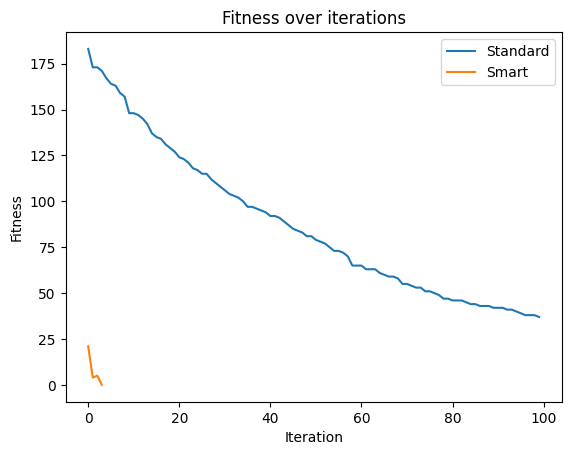

Standard alg: 251.78 seconds
Smart alg: 15.91 seconds


In [7]:
compare_gen_algs(28, 200, max_iter=100)

# Only smart

Test the smart GA algorithm on larger graphs

In [13]:
g = ga.Graph(800, 0.4)
pop = ga.SmartPopulation(186, 50, g)

fitness_history = []
for i in range(300):
    pop.evolve()
    print(f"Generation {i}, best fitness: {pop.best_fitness}")
    fitness_history.append(pop.best_fitness)
    if pop.best_fitness == 0:
        print(f"Solution found in {i} iterations")
        break

Generation 0, best fitness: 30
Generation 1, best fitness: 3
Generation 2, best fitness: 0
Solution found in 2 iterations


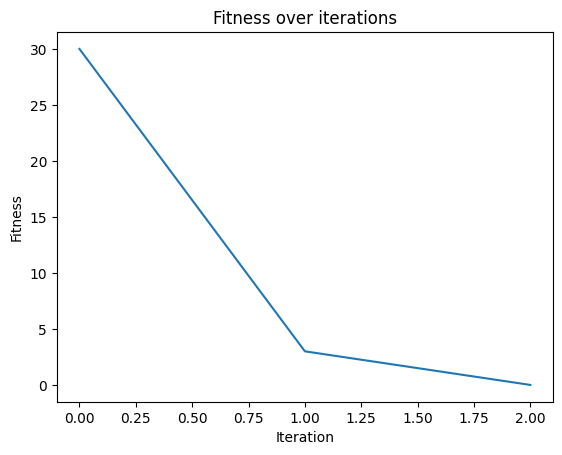

In [14]:
# plot
plt.plot(fitness_history)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness over iterations')
plt.show()

## Results

The results show that the smarter implementation of GA can find solutions faster and more efficiently than the naive implementation, especially for larger graphs.
This suggests that incorporating problem-specific knowledge into the design of genetic operators can significantly improve the performance of GA.

Proper benchmark should be performed to establish the performance of the GA against other algorithms.